In [36]:
import json
import pandas as pd

In [37]:
import random
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         '/content/data.csv', 
         skiprows=lambda i: i>0 and random.random() > p)

In [38]:
df.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.992,"['Francisco Canaro', 'Charlo']",0.373,204000,0.239,0,43aHhXYKEQ6iitIbfFdUWI,0.848,4,0.179,-9.449,1,Nunca Jamás - Remasterizado,0,1930-11-13,0.079,83.856,0.589,1930
1,0.491,['Эрнест Хемингуэй'],0.729,101745,0.136,1,4q6G3SMiRzm5udxGEw6jyx,0.000,11,0.118,-16.814,0,Часть 8.4 & Часть 9.1 - Зеленые холмы Африки,0,1935,0.936,83.848,0.510,1935


In [39]:
df['artists'] = df['artists'].apply(lambda x: x[1:-1].split(', ')) # makes the string lists in artists column into actual lists

df = df.explode('artists') # opens the lists so that each artist is on a song has his own row with the song

df['artists'] = df['artists'].apply(lambda x: x.strip("'")) #  we want to take off the quotes on the artists

In [40]:
#using only these three to test 
raw_data =  df.loc[:,['artists','name','popularity','year']] 

In [41]:
raw_data

,artists,name,popularity,year
0,Francisco Canaro,Nunca Jamás - Remasterizado,0,1930
0,Charlo,Nunca Jamás - Remasterizado,0,1930
1,Эрнест Хемингуэй,Часть 8.4 & Часть 9.1 - Зеленые холмы Африки,0,1935
2,Jeanette MacDonald,"Dinah, Some of These Days",0,1936
2,Gilda Gray,"Dinah, Some of These Days",0,1936
...,...,...,...,...
1635,The National,Don't Swallow the Cap,58,2013
1636,Dimitri Vegas & Like Mike,Tremor - Sensation 2014 Anthem,58,2014
1636,Martin Garrix,Tremor - Sensation 2014 Anthem,58,2014
1637,Imagine Dragons,Walking The Wire,70,2017


In [42]:
raw_data['artists'].value_counts()

Эрнест Хемингуэй                    24
Francisco Canaro                    22
Wolfgang Amadeus Mozart             10
Johnny Cash                          9
Ludwig van Beethoven                 9
                                    ..
Victorious Cast                      1
Richard Himber and his Orchestra     1
Ahmad Jamal                          1
Cher                                 1
Citizen                              1
Name: artists, Length: 1557, dtype: int64

In [43]:
import plotly.express as px

def top_n_artists_by_song_count(data, lower_bound, upper_bound):
    
    reindex_order = data['artists'].value_counts()[lower_bound:upper_bound].index[::-1]     
    # order of index to make right values in right places
        
    total_value_of_songs = data['artists'].value_counts()[lower_bound:upper_bound].reindex(reindex_order)
    
    total_value_of_popularity =  data.groupby(['artists']).sum()['popularity'].reindex(reindex_order)   # so we can see their popularity too
    
    df = pd.DataFrame({('Artist ') :total_value_of_songs.index, 
                        ('Total Song Count '): total_value_of_songs.values,
                        ('Total Artist Popularity '): total_value_of_popularity.values}) 
  
    fig = px.bar(df, x = ('Total Song Count ') , y = ('Artist '),
                    
                     hover_data = [('Total Song Count '), ('Total Artist Popularity ')],
                                       
                     color = ('Total Song Count ') , title= f'Artists Song Count Ranked ({lower_bound+1},{upper_bound}) ',
               
                     height = 700  )

    return fig.show()

In [44]:
top_n_artists_by_song_count(raw_data,0,20)

In [45]:
#top artist by popularity
df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)

artists
Queen                       358
Bob Marley & The Wailers    350
Eminem                      308
Johnny Cash                 257
Willie Nelson               222
Red Hot Chili Peppers       220
The Beach Boys              219
The Smiths                  218
Nickelback                  215
Kanye West                  204
Young Thug                  198
Vampire Weekend             181
Waylon Jennings             178
Drake                       176
Bob Dylan                   175
Bad Bunny                   174
Lana Del Rey                169
Breaking Benjamin           166
David Bowie                 164
Elvis Presley               151
Name: popularity, dtype: int64

In [46]:
def top_n_artists_by_popularity(data, lower_bound, upper_bound):
    

    reindex_order =  data.groupby(['artists']).sum()['popularity'].sort_values(ascending = False)[lower_bound:upper_bound].index[::-1]     
    # order of index to make right values in right places
        
    total_value_of_popularity =  data.groupby(['artists']).sum()['popularity'].sort_values(ascending = False)[
        lower_bound:upper_bound].reindex(reindex_order)
    
    total_songs = data['artists'].value_counts().round(0).reindex(reindex_order)   
    
    df = pd.DataFrame({('Artist ') :total_value_of_popularity.index, 
                        ('Total Artist Popularity '): total_value_of_popularity.values,
                        ('Total Song Count '): total_songs.values}) 
  
    fig = px.bar(df, x = ('Total Artist Popularity ') , y = ('Artist '),
                    
                     hover_data = [('Total Artist Popularity '), ('Total Song Count ')],
                                       
                     color = ('Total Artist Popularity ') , title= f'Artists Popularity Ranked ({lower_bound +1},{upper_bound})',
               
                     height = 700  )

    return fig.show()

In [47]:
top_n_artists_by_popularity(raw_data, 0, 20)

In [48]:
data_w_genres = pd.read_csv('data_w_genres.csv')

In [49]:
data_w_genres.sample(5)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
26931,Yuri Bashmet,0.925000,0.241000,209373.000000,0.1220,0.660000,0.126000,-22.411000,0.049700,66.325000,0.187000,54.0,7,1,2,"['classical performance', 'viola']"
2911,Bob Baldwin,0.049700,0.705000,346267.000000,0.8540,0.877000,0.097700,-8.167000,0.041700,89.015000,0.673000,43.0,4,0,1,"['jazz funk', 'smooth jazz']"
24382,The Originals,0.467640,0.377400,223330.800000,0.4542,0.000725,0.211600,-10.795600,0.034320,153.692000,0.521600,37.8,5,1,10,['doo-wop']
27338,Γιώργος Μπάτης,0.919286,0.648429,195063.857143,0.4090,0.087918,0.217729,-9.810857,0.124857,116.964714,0.668571,0.0,11,0,14,[]
27135,dark cat,0.182000,0.753000,243375.000000,0.6690,0.077400,0.442000,-7.390000,0.050500,159.994000,0.660000,61.0,2,1,1,"['future funk', 'kawaii future bass']"


In [50]:
pd.options.mode.chained_assignment = None 

data_genre = data_w_genres.loc[:,['artists','count','genres','popularity']] # lets explore these columns for now
# makes it into actual list instead of string list
data_genre['genres'] = data_genre['genres'].apply(lambda x: x[1:-1].split(', '))  

for i in data_genre.index:
# filters out empty values in each list
    data_genre['genres'].loc[i] = list(filter(None, data_genre['genres'][i]))  
    

data_genre.head(10)

,artists,count,genres,popularity
0,"""Cats"" 1981 Original London Cast",12,['show tunes'],38.000000
1,"""Cats"" 1983 Broadway Cast",26,[],33.076923
2,"""Fiddler On The Roof” Motion Picture Chorus",7,[],34.285714
3,"""Fiddler On The Roof” Motion Picture Orchestra",27,[],34.444444
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",9,[],42.555556
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",36,[],34.166667
6,"""Mama"" Helen Teagarden",2,[],0.000000
7,"""Mista Dj Paul",1,[],36.000000
8,"""Test for Victor Young""",2,[],2.000000
9,"""Weird Al"" Yankovic",132,"['antiviral pop', 'comedy rock', 'comic', 'par...",33.681818


In [51]:
genre_counts = data_w_genres.groupby('genres')['artists'].count().sort_values(ascending=False)  
genre_counts.head(10)

genres
[]                                         9530
['movie tunes']                              78
['show tunes']                               63
['classical piano']                          57
['sleep']                                    56
['broadway', 'hollywood', 'show tunes']      53
['hollywood']                                52
['background music']                         49
['disney', 'movie tunes']                    49
['orchestral performance']                   46
Name: artists, dtype: int64

In [52]:
missing_genre_artists = data_genre[data_genre['genres'].map(lambda x: len(x)) < 1]
missing_genre_artists

,artists,count,genres,popularity
1,"""Cats"" 1983 Broadway Cast",26,[],33.076923
2,"""Fiddler On The Roof” Motion Picture Chorus",7,[],34.285714
3,"""Fiddler On The Roof” Motion Picture Orchestra",27,[],34.444444
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",9,[],42.555556
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",36,[],34.166667
...,...,...,...,...
27613,霜華雪華,104,[],23.153846
27614,韋綺珊,1,[],40.000000
27615,高慧君,2,[],52.000000
27618,黃國隆,11,[],20.000000


In [53]:
missing_genre_artists_split = missing_genre_artists.copy()
missing_genre_artists_split['artists'] = missing_genre_artists_split['artists'].apply(lambda x: x.split())  # split into words
missing_genre_artists_split

,artists,count,genres,popularity
1,"[""Cats"", 1983, Broadway, Cast]",26,[],33.076923
2,"[""Fiddler, On, The, Roof”, Motion, Picture, Ch...",7,[],34.285714
3,"[""Fiddler, On, The, Roof”, Motion, Picture, Or...",27,[],34.444444
4,"[""Joseph, And, The, Amazing, Technicolor, Drea...",9,[],42.555556
5,"[""Joseph, And, The, Amazing, Technicolor, Drea...",36,[],34.166667
...,...,...,...,...
27613,[霜華雪華],104,[],23.153846
27614,[韋綺珊],1,[],40.000000
27615,[高慧君],2,[],52.000000
27618,[黃國隆],11,[],20.000000


In [54]:
def word_count(data):

    all_words = []  
    for elmnt in data['artists']:  
        all_words += elmnt  

    val_counts = pd.Series(all_words).value_counts()

    return val_counts.head(40)

word_count(missing_genre_artists_split)

The          486
Orchestra    373
&            270
His          145
and          104
Ensemble      94
John          83
de            82
De            67
of            59
David         57
And           56
Paul          55
Band          55
Chorus        54
Robert        54
George        51
James         47
the           47
Of            46
Cast          45
-             44
Michael       43
Lee           41
Richard       41
with          39
di            39
Choir         37
Los           36
Original      35
Broadway      35
Peter         35
Orchestre     34
Orquesta      34
Jack          34
La            32
Bob           32
Jimmy         32
Trio          32
Martin        31
dtype: int64

In [55]:
data_genre[data_genre['genres'].map(lambda x: len(x)) < 1].sort_values(ascending = False,by = 'count').head(20)

,artists,count,genres,popularity
27524,Эрнест Хемингуэй,2430,[],0.000000
27523,Эрих Мария Ремарк,1562,[],0.000000
18014,Orchestra Studio 7,476,[],0.012605
25726,Unspecified,456,[],1.192982
8933,Giorgos Papasideris,320,[],0.015625
18009,Orchestra Sinfonica di Roma della RAI,314,[],0.000000
20221,Rita Ampatzi,263,[],0.003802
18156,Oscar Levant,239,[],0.569038
4492,Christoph Waltz,218,[],15.082569
21803,Sinclair Lewis,212,[],0.014151


In [56]:
pd.options.mode.chained_assignment = None 

for i in data_genre.index:
    
    if 'Broadway' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'broadway'")
    if 'Motion Picture' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'movie tunes'")
    if 'Cast' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'ensemble'")     # we will put any cast artists under ensemble genre 
    if 'Ensemble' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'ensemble'")  
    if 'Orchestra' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'orchestra'")
    if 'Orquesta' in data_genre['artists'].loc[i]:              # these are just vara
        data_genre['genres'].loc[i].append("'orchestra'")
    if 'Orchestre' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'orchestra'")
    if 'Chorus' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'chorus'")
    if 'Choir' in data_genre['artists'].loc[i]:
        data_genre['genres'].loc[i].append("'choir'")
        
    data_genre['genres'].loc[i] = list(dict.fromkeys(data_genre['genres'].loc[i])) # removes duplicates
    

data_genre.head(12)

,artists,count,genres,popularity
0,"""Cats"" 1981 Original London Cast",12,"['show tunes', 'ensemble']",38.000000
1,"""Cats"" 1983 Broadway Cast",26,"['broadway', 'ensemble']",33.076923
2,"""Fiddler On The Roof” Motion Picture Chorus",7,"['movie tunes', 'chorus']",34.285714
3,"""Fiddler On The Roof” Motion Picture Orchestra",27,"['movie tunes', 'orchestra']",34.444444
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",9,['ensemble'],42.555556
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",36,['ensemble'],34.166667
6,"""Mama"" Helen Teagarden",2,[],0.000000
7,"""Mista Dj Paul",1,[],36.000000
8,"""Test for Victor Young""",2,[],2.000000
9,"""Weird Al"" Yankovic",132,"['antiviral pop', 'comedy rock', 'comic', 'par...",33.681818


In [57]:
final_data_genre = data_genre[data_genre['genres'].map(lambda x: len(x)) > 0] # removes empty lists
final_data_genre = final_data_genre.reset_index(drop=True)
final_data_genre = final_data_genre.drop('count', axis =1 )
final_data_genre.rename(columns={'popularity': 'Artist Popularity'}, inplace=True)
final_data_genre['Artist Popularity'] = final_data_genre['Artist Popularity'].astype(int)
final_data_genre

,artists,genres,Artist Popularity
0,"""Cats"" 1981 Original London Cast","['show tunes', 'ensemble']",38
1,"""Cats"" 1983 Broadway Cast","['broadway', 'ensemble']",33
2,"""Fiddler On The Roof” Motion Picture Chorus","['movie tunes', 'chorus']",34
3,"""Fiddler On The Roof” Motion Picture Orchestra","['movie tunes', 'orchestra']",34
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",['ensemble'],42
...,...,...,...
18801,陳秀男,['taiwan campus folk'],44
18802,陳蘭麗,['taiwan campus folk'],34
18803,鳳飛飛,"['c-pop', 'classic mandopop', 'vintage chinese...",35
18804,黃品源,"['c-pop', 'classic cantopop', 'classic mandopop']",47


In [58]:
def rank_artist_similarity(data, artist, genre_parameter):
    artist_data = data[data.artists == artist]
    artist_genres = set(*artist_data.genres)
    similarity_data = data.drop(artist_data.index)
    similarity_data.genres = similarity_data.genres.apply(lambda genres: list(set(genres).intersection(artist_genres)))
    similarity_lengths = similarity_data.genres.str.len()
    similarity_data = similarity_data.reindex(similarity_lengths[similarity_lengths >= genre_parameter].sort_values(ascending=False).index)
    similarity_data.rename(columns={'artists': f'Similar Artists to {artist}', 'genres': 'Similar Genres', 'popularity': 'Artist Popularity'}, inplace=True)
    return similarity_data

In [59]:
rank_artist_similarity(final_data_genre, 'Eminem',3)

,Similar Artists to Eminem,Similar Genres,Artist Popularity
18335,Xzibit,"['detroit hip hop', 'hip hop', 'rap']",51
15761,Tee Grizzley,"['detroit hip hop', 'hip hop', 'rap']",65
12102,Obie Trice,"['detroit hip hop', 'hip hop', 'rap']",50
5878,GRiZ,"['detroit hip hop', 'hip hop', 'rap']",53
3865,Danny Brown,"['detroit hip hop', 'hip hop', 'rap']",55
3674,D12,"['detroit hip hop', 'hip hop', 'rap']",50
1743,Big Sean,"['detroit hip hop', 'hip hop', 'rap']",58
1700,Big B,"['detroit hip hop', 'hip hop', 'rap']",41
1336,Bad Meets Evil,"['detroit hip hop', 'hip hop', 'rap']",55


In [60]:
merged_df = raw_data.merge(final_data_genre, how = 'inner', on = ['artists'])
merged_df_copy = merged_df.copy()
merged_df_copy.rename(columns={'artists': 'Artist', 'name':'Song Name','popularity':'Song Popularity','year':'Year','genres':'Genres'}, inplace=True)

merged_df_copy

,Artist,Song Name,Song Popularity,Year,Genres,Artist Popularity
0,Francisco Canaro,Nunca Jamás - Remasterizado,0,1930,"['tango', 'vintage tango']",0
1,Francisco Canaro,Sin Palabras - Remasterizado,0,1946,"['tango', 'vintage tango']",0
2,Francisco Canaro,Te Espero en Rodriguez Peña - Remasterizado,0,1946,"['tango', 'vintage tango']",0
3,Francisco Canaro,Camel - Remasterizado,0,1923,"['tango', 'vintage tango']",0
4,Francisco Canaro,Oh Mujer Mujer - Remasterizado,0,1924,"['tango', 'vintage tango']",0
...,...,...,...,...,...,...
1831,J. Cole,God's Gift,50,2011,"['conscious hip hop', 'hip hop', 'nc hip hop',...",61
1832,The National,Don't Swallow the Cap,58,2013,"['indie rock', 'modern rock']",49
1833,Dimitri Vegas & Like Mike,Tremor - Sensation 2014 Anthem,58,2014,"['belgian dance', 'belgian edm', 'big room', '...",48
1834,Martin Garrix,Tremor - Sensation 2014 Anthem,58,2014,"['big room', 'edm', 'pop', 'progressive house'...",67


In [61]:
merged_df_copy['Genres_cleaned'] = [','.join(map(str, l)) for l in merged_df_copy['Genres']]
merged_df_copy

,Artist,Song Name,Song Popularity,Year,Genres,Artist Popularity,Genres_cleaned
0,Francisco Canaro,Nunca Jamás - Remasterizado,0,1930,"['tango', 'vintage tango']",0,"'tango','vintage tango'"
1,Francisco Canaro,Sin Palabras - Remasterizado,0,1946,"['tango', 'vintage tango']",0,"'tango','vintage tango'"
2,Francisco Canaro,Te Espero en Rodriguez Peña - Remasterizado,0,1946,"['tango', 'vintage tango']",0,"'tango','vintage tango'"
3,Francisco Canaro,Camel - Remasterizado,0,1923,"['tango', 'vintage tango']",0,"'tango','vintage tango'"
4,Francisco Canaro,Oh Mujer Mujer - Remasterizado,0,1924,"['tango', 'vintage tango']",0,"'tango','vintage tango'"
...,...,...,...,...,...,...,...
1831,J. Cole,God's Gift,50,2011,"['conscious hip hop', 'hip hop', 'nc hip hop',...",61,"'conscious hip hop','hip hop','nc hip hop','po..."
1832,The National,Don't Swallow the Cap,58,2013,"['indie rock', 'modern rock']",49,"'indie rock','modern rock'"
1833,Dimitri Vegas & Like Mike,Tremor - Sensation 2014 Anthem,58,2014,"['belgian dance', 'belgian edm', 'big room', '...",48,"'belgian dance','belgian edm','big room','edm'..."
1834,Martin Garrix,Tremor - Sensation 2014 Anthem,58,2014,"['big room', 'edm', 'pop', 'progressive house'...",67,"'big room','edm','pop','progressive house','tr..."


In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
merged_df_copy['Artist'] = labelencoder.fit_transform(merged_df_copy['Artist'])
merged_df_copy['Genres_cleaned'] = labelencoder.fit_transform(merged_df_copy['Genres_cleaned'].values)
merged_df_copy['Song Name'] = labelencoder.fit_transform(merged_df_copy['Song Name'])
merged_df_copy

,Artist,Song Name,Song Popularity,Year,Genres,Artist Popularity,Genres_cleaned
0,373,852,0,1930,"['tango', 'vintage tango']",0,1120
1,373,1049,0,1946,"['tango', 'vintage tango']",0,1120
2,373,1166,0,1946,"['tango', 'vintage tango']",0,1120
3,373,182,0,1923,"['tango', 'vintage tango']",0,1120
4,373,859,0,1924,"['tango', 'vintage tango']",0,1120
...,...,...,...,...,...,...,...
1831,492,446,50,2011,"['conscious hip hop', 'hip hop', 'nc hip hop',...",61,678
1832,1151,309,58,2013,"['indie rock', 'modern rock']",49,968
1833,274,1291,58,2014,"['belgian dance', 'belgian edm', 'big room', '...",48,408
1834,735,1291,58,2014,"['big room', 'edm', 'pop', 'progressive house'...",67,418


In [63]:
merged_df_copy['Genres_cleaned'].value_counts()

1059    30
1120    30
645     18
643     14
642     14
        ..
712      1
711      1
710      1
709      1
0        1
Name: Genres_cleaned, Length: 1134, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X = merged_df_copy[['Artist', 'Song Popularity', 'Year', 'Song Name', 'Artist Popularity']].values
y = merged_df_copy['Genres_cleaned'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1468, 5), (368, 5), (1468,), (368,))

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [81]:
# Instantiating Model
model2 = Sequential()
# Input Layer
model2.add(Dense(2, input_dim=5, activation="selu"))
# Hidden Layer 1 
model2.add(Dense(16, activation="relu"))
# Hidden Layer 2
model2.add(Dense(8, activation="relu"))
# Output Layer
model2.add(Dense(1, activation="softmax"))
# Compiler
model2.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# Fit
h2 = model2.fit(X_train, y_train, epochs=3)

Epoch 1/3
46/46 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0014
Epoch 2/3
46/46 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0014
Epoch 3/3
46/46 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0014


In [ ]:
#think about combining knn with nn 
#1 i need to figure out which nn i should use for recommender system? 
# WHAT I KNOW: 
## I know that i am running a categorical nn using the genre numbers as the output

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [58]:
# Split train into train & val


X = df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo',
       'valence']]

y = df['name']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, test_size=0.20)

In [67]:
pip install sklearn

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(n_neighbors=1000)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                     weights='uniform')

In [95]:
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.0


In [97]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 1000)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Text(0, 0.5, 'Testing Accuracy')

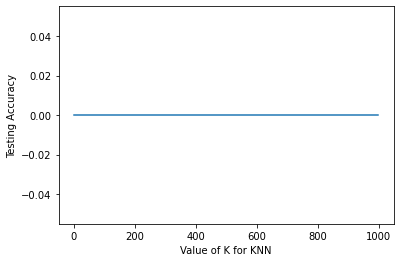

In [98]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [105]:
x = ['Midnight Hour Blues']
a = np.reshape(x,(-1,1))

In [106]:
a

array([['Midnight Hour Blues']], dtype='<U19')

In [107]:
knn.predict(a)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


ValueError: ignored

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                                                                                       precision    recall  f1-score   support

                                                         "Chi il bel sogno di Doretta" from La rondine, Act I - Voice       0.00      0.00      0.00       1.0
                                                                                                   '97 Bonnie & Clyde       0.00      0.00      0.00       0.0
                                                                    (Is Anybody Going To) San Antone - Single Version       0.00      0.00      0.00       0.0
                                                                                            (Love Is) The Tender Trap       0.00      0.00      0.00       0.0
                                                                   10 Preludes, Op. 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
